In [38]:
import pandas as pd
Data_Sample = pd.read_parquet('/Users/anna/Desktop/ANLP/Assignments/AT2/AT2B/Step2 Combined Data.parquet', engine='pyarrow')
Data_Sample.head(3)

,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity,Text_Cleaned
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,1.0,51,3,0.450000,0.433333,3,83.082500,I buy vitality dog food product find good qual...
1,1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,1.0,109,8,0.133571,0.448571,15,93.468140,confection century light pillowy citrus gelati...
2,2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,1.0,46,3,0.166667,0.533333,5,77.412114,look secret ingredient robitussin I believe I ...


In [39]:
Data_Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298402 entries, 0 to 298401
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              298402 non-null  int64  
 1   index                   298402 non-null  int64  
 2   Id                      298402 non-null  int64  
 3   ProductId               298402 non-null  object 
 4   UserId                  298402 non-null  object 
 5   ProfileName             298397 non-null  object 
 6   HelpfulnessNumerator    298402 non-null  int64  
 7   HelpfulnessDenominator  298402 non-null  int64  
 8   Score                   298402 non-null  int64  
 9   Time                    298402 non-null  int64  
 10  Summary                 298376 non-null  object 
 11  Text                    298402 non-null  object 
 12  Helpfulness             298402 non-null  float64
 13  n_words                 298402 non-null  int64  
 14  n_sents             

In [40]:
#view null values
Data_Sample.isnull().sum()

Unnamed: 0                 0
index                      0
Id                         0
ProductId                  0
UserId                     0
ProfileName                5
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
Helpfulness                0
n_words                    0
n_sents                    0
polarity                   0
subjectivity               0
n_punct                    0
Readablity                 0
Text_Cleaned               0
dtype: int64

In [41]:
#outliers do not remove
#sns.boxplot(Data_Sample['Helpfulness'])

In [42]:
Features = pd.read_parquet('/Users/anna/Desktop/ANLP/Assignments/AT2/AT2B/Step5 Combined Features.parquet', engine='pyarrow')
Features.head(3)

,actually,add,amazon,arrive,away,bad,bag,bar,bean,big,...,wonderful,work,worth,year,n_words,n_sents,polarity,subjectivity,n_punct,Readablity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,51,3,0.450000,0.433333,3,83.082500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,109,8,0.133571,0.448571,15,93.468140
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46,3,0.166667,0.533333,5,77.412114


In [43]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298402 entries, 0 to 298401
Columns: 206 entries, actually to Readablity
dtypes: float64(203), int64(3)
memory usage: 469.0 MB


In [44]:
#ClassificatioN Modelling

In [45]:
# Assign Label for categorical data
Data_Sample['Helpfulness Label'] = 0
Data_Sample['Helpfulness Label'][(Data_Sample.Helpfulness >=0.8) & (Data_Sample.HelpfulnessDenominator >=10)] = 1
Data_Sample.head(3)

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_60688/10014101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Sample['Helpfulness Label'][(Data_Sample.Helpfulness >=0.8) & (Data_Sample.HelpfulnessDenominator >=10)] = 1


,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,...,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity,Text_Cleaned,Helpfulness Label
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,...,i have bought several of the vitality canned d...,1.0,51,3,0.450000,0.433333,3,83.082500,I buy vitality dog food product find good qual...,0
1,1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,...,this is a confection that has been around a fe...,1.0,109,8,0.133571,0.448571,15,93.468140,confection century light pillowy citrus gelati...,0
2,2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,...,if you are looking for the secret ingredient i...,1.0,46,3,0.166667,0.533333,5,77.412114,look secret ingredient robitussin I believe I ...,0


In [46]:
# Define X and y
y = Data_Sample['Helpfulness Label'] #Target varaible
X = Features #Features TDIF Vectorizer


In [47]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [48]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/Users/anna/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#Confusion Matrix
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[70490,    45],
       [ 4029,    37]])

Text(0.5, 427.9555555555555, 'Predicted label')

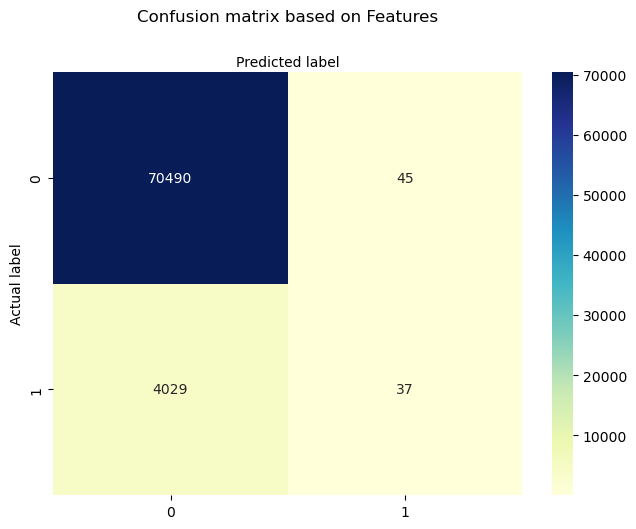

In [50]:
#Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix based on Features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#True Positive - no. predictions made for '1 = Helpful' and actual status of the Helpful is '1'. 37 True Positive
#True Negative - no. predictions made for '0 = Not Helpful' and actual status of the Helpful is '0'. 70490 is True Negative


In [51]:
#Accuracy from confusion matrix
TP= cnf_matrix[1,1] #True positive
TN= cnf_matrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.9453894719909921


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y, logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    282070
           1       0.43      0.01      0.02     16332

    accuracy                           0.95    298402
   macro avg       0.69      0.50      0.49    298402
weighted avg       0.92      0.95      0.92    298402



In [56]:
# XGBClassifier and no feature engineering:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('Accuracy score is:', xgb_score)


Accuracy score is: 0.9518505113872469


In [61]:
#Resampling Techniques to Solve Class Imbalance

# class count
class_count_0, class_count_1 = Data_Sample['Helpfulness Label'].value_counts()

# Separate class
class_0 = Data_Sample[Data_Sample['Helpfulness Label'] == 0]
class_1 = Data_Sample[Data_Sample['Helpfulness Label']==1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (282070, 21)
class 1: (16332, 21)


In [64]:
#1. Random Under-Sampling
removing some observations of the majority cla
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Helpfulness Label'].value_counts().plot(kind='bar', title='count (target)')


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Define X and y
y = Data_Sample['Helpfulness Label'] #Target varaible
X = Data_Sample['Text_Cleaned'] #Features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [31]:

# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9476146432353454


/Users/anna/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Data_Sample['Text_Cleaned'])
y= Data_Sample['Helpfulness Label']
print(vectorizer.get_feature_names())


['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaagghh', 'aaaaaaarrrrrggghhh', 'aaaaaah', 'aaaaaahhh', 'aaaaaahhhhh', 'aaaaaahhhhhyaaaaaa', 'aaaaah', 'aaaaahhhhhhhhhhhhhhhh', 'aaaaallll', 'aaaah', 'aaaahhhhhh', 'aaaand', 'aaagh', 'aaah', 'aaahhh', 'aachen', 'aachener', 'aacurate', 'aad', 'aadmit', 'aadp', 'aadult', 'aaf', 'aafco', 'aafe', 'aah', 'aahhe', 'aahing', 'aain', 'aand', 'aany', 'aap', 'aardvark', 'aarp', 'aarrgghhhh', 'aarthur', 'aash', 'aauce', 'ab', 'aback', 'abalone', 'abamectin', 'abandne', 'abandoe', 'abandon', 'abandonment', 'abate', 'abb', 'abba', 'abbazabba', 'abbey', 'abbie', 'abbot', 'abbott', 'abbotts', 'abbreviate', 'abbreviation', 'abby', 'abbypomeroy', 'abc', 'abcstore', 'abd', 'abdoman', 'abdomen', 'abdominal', 'abduct', 'abdul', 'abdy', 'abe', 'abeja', 'abejas', 'abel', 'abeneficial', 'aber', 'aberdeen', 'aberfoyle', 'aberrant', 'aberration', 'abet', 'abetter', 'abfab', 'abhor', 'abhorrent', 'abi', 'abid', 'abide', 'abietate', 'abigirl', 'abiiity', 'abililty', 'abilite

/Users/anna/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [34]:
print('Train', X_train.shape, y_train.shape) #text sentence
print('Test', X_test.shape, y_test.shape)

Train (223801, 68708) (223801,)
Test (74601, 68708) (74601,)


In [109]:
##### NB Text Classficiation###############

import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style